<h1>Family Income and Expenditure Data Analytics</h1>
<hr>


In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [87]:
family = pd.read_csv('Family Income and Expenditure.csv')

In [88]:
family['Household Head Occupation'] = family['Household Head Occupation'].fillna('uknown')
family['Household Head Class of Worker'] = family['Household Head Class of Worker'].fillna('uknown')
family['Toilet Facilities'] = family['Toilet Facilities'].fillna('uknown')

In [89]:
family['Region'].value_counts()

Region
IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: count, dtype: int64

In [90]:
#filter data
IVA = family[family['Region'] == 'IVA - CALABARZON']

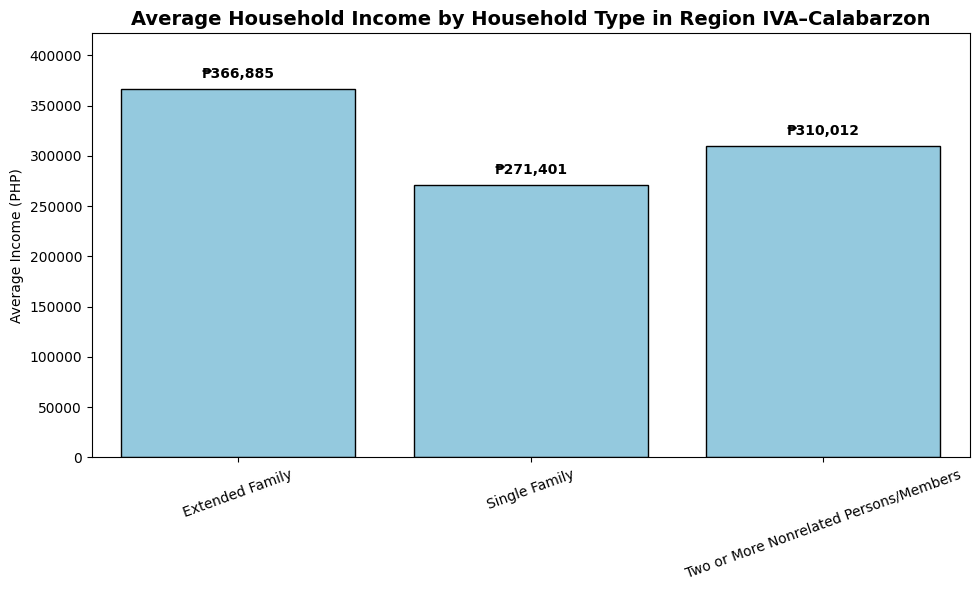

In [91]:
# Descriptive analytics 1
avg_income = IVA.groupby("Type of Household")["Total Household Income"].mean()
avg_df = avg_income.reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_df, 
    x="Type of Household", 
    y="Total Household Income",
    color="skyblue",
    edgecolor="black"
)

max_val = avg_df["Total Household Income"].max()
plt.ylim(0, max_val * 1.15)    

# Add value labels above bars
for i, row in avg_df.iterrows():
    value = row["Total Household Income"]
    ax.text(
        i, 
        value + (max_val * 0.02),   
        f"₱{value:,.0f}",           
        ha="center", 
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.xticks(rotation=20)
plt.title("Average Household Income by Household Type in Region IVA–Calabarzon", 
          fontsize=14, fontweight="bold")
plt.ylabel("Average Income (PHP)")
plt.xlabel("")

plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>The visualization shows that household income in Region IVA (CALABARZON) varies significantly by household type. Extended families have the highest average income, likely because they include multiple adult earners contributing to the household budget. Households with two or more unrelated persons also show relatively high income, suggesting a similar pattern of shared earning power.</p>

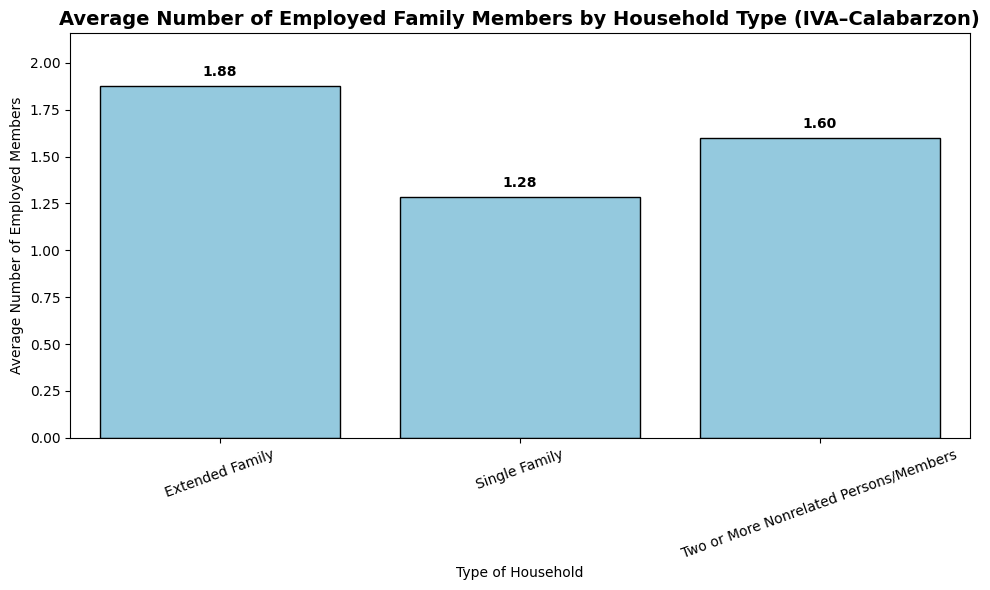

In [92]:
# Diagnostic analytics to support 1
employed = IVA.groupby("Type of Household")["Total number of family members employed"].mean()
employed_rounded = employed.reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=employed_rounded,
    x="Type of Household",
    y="Total number of family members employed",
    color="skyblue",
    edgecolor="black"
)

max_height = employed_rounded["Total number of family members employed"].max()
plt.ylim(0, max_height * 1.15)

# Add bar labels
for i, row in employed_rounded.iterrows():
    value = row["Total number of family members employed"]
    ax.text(
        i,
        value + (max_height * 0.02),  
        f"{value:.2f}",              
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.xticks(rotation=20)
plt.ylabel("Average Number of Employed Members")
plt.xlabel("Type of Household")
plt.title(
    "Average Number of Employed Family Members by Household Type (IVA–Calabarzon)",
    fontsize=14,
    fontweight="bold"
)
plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>This visualization reveals why extended families have the highest household income in Region IVA (Calabarzon). Extended households show the highest average number of employed members (1.88), followed by households with two or more unrelated persons (1.60). Single-family households have the fewest employed members (1.28).</p>

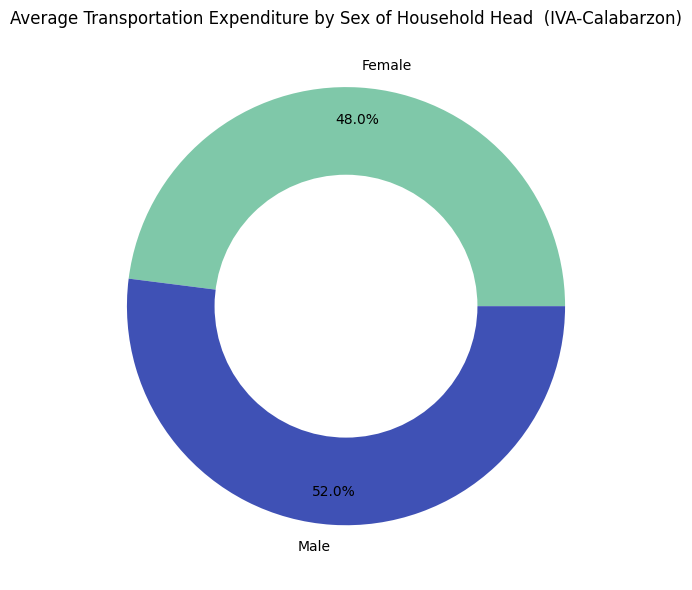

In [93]:
#descriptive analytics 2
IVA = family[family['Region'] == 'IVA - CALABARZON']

transpo = IVA.groupby("Household Head Sex")["Transportation Expenditure"].mean()

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    transpo.values, 
    labels=transpo.index,
    autopct='%1.1f%%',  
    pctdistance=0.85,
    colors = ('#7FC8A9', '#3F51B5'),
)

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average Transportation Expenditure by Sex of Household Head  (IVA-Calabarzon)")
plt.tight_layout()
plt.show()

<h2>Insight</h2>
<hp>The pie chart reveals a clear difference in average transportation expenditure between male-headed and female-headed households in Region IVA (Calabarzon). Male household heads account for a larger share of transportation spending, indicating that households led by men tend to allocate more of their budget to transportation.</p>

<Figure size 800x600 with 0 Axes>

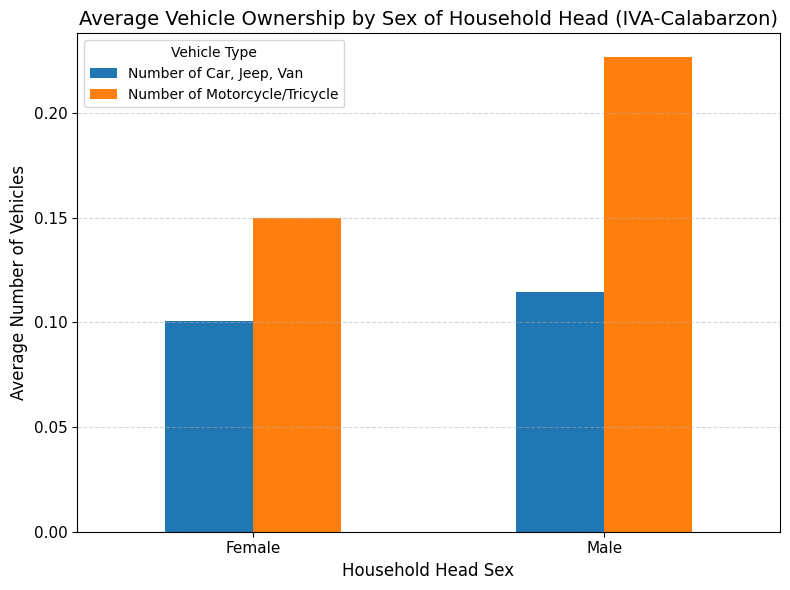

In [95]:
#diagnostic analytics to support 2
veh_means = IVA.groupby("Household Head Sex")[[
    "Number of Car, Jeep, Van",
    "Number of Motorcycle/Tricycle"
]].mean()

# Plot
plt.figure(figsize=(8,6))

veh_means.plot(
    kind='bar',
    figsize=(8,6)
)

plt.title("Average Vehicle Ownership by Sex of Household Head (IVA-Calabarzon)", fontsize=14)
plt.xlabel("Household Head Sex", fontsize=12)
plt.ylabel("Average Number of Vehicles", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Vehicle Type", fontsize=10)

plt.tight_layout()
plt.show()

<h2>Insight</h2>
<hp>The diagnostic analysis of vehicle ownership provides a key explanation for why male-headed households in Region IVA (Calabarzon) show higher average transportation expenditures. The bar chart indicates that male household heads generally own more vehicles—particularly cars, jeeps, vans, and motorcycles—compared to female-headed households. Higher vehicle ownership naturally leads to increased spending on fuel, maintenance, parking, and other transportation-related costs.</p>

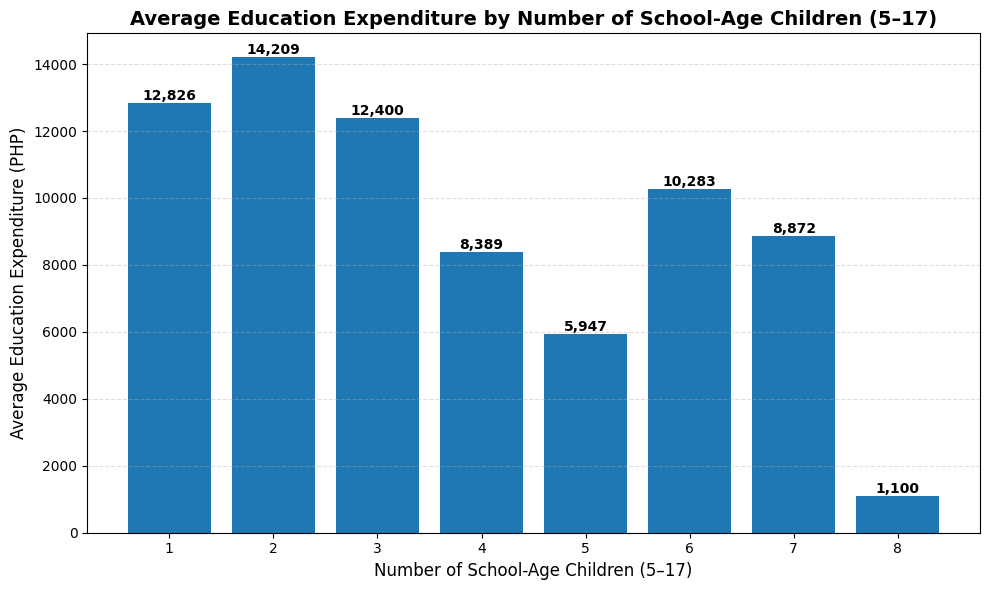

In [96]:
# descriptive analytics 3
filtered_IVA = IVA[IVA['Members with age 5 - 17 years old'] > 0]


edu_group = filtered_IVA.groupby(
    'Members with age 5 - 17 years old'
)['Education Expenditure'].mean()


plt.figure(figsize=(10,6))
bars = plt.bar(edu_group.index.astype(str), edu_group.values)


plt.title("Average Education Expenditure by Number of School-Age Children (5–17)", fontsize=14, weight='bold')
plt.xlabel("Number of School-Age Children (5–17)", fontsize=12)
plt.ylabel("Average Education Expenditure (PHP)", fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.4)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:,.0f}",          
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>The visualization reveals an unexpected pattern: households with fewer school-age children (ages 5–17) tend to have the highest average education expenditure, while those with more children spend less per household on average. This suggests that education spending does not increase proportionally with family size.</p>

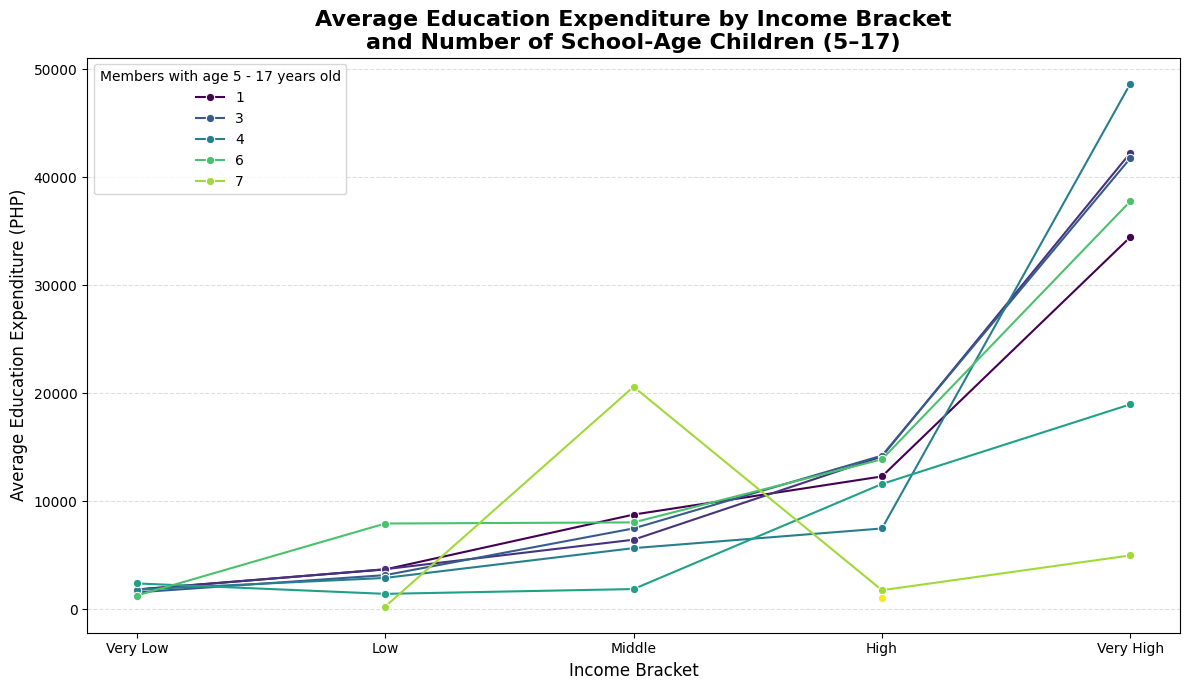

In [97]:
# diagnostic analytics to support 3
filtered_IVA["Income Bracket"] = pd.qcut(
    filtered_IVA["Total Household Income"],
    q=5,
    labels=["Very Low", "Low", "Middle", "High", "Very High"]
)

income_exp_group = filtered_IVA.groupby(["Income Bracket", "Members with age 5 - 17 years old"])["Education Expenditure"].mean().reset_index()

plt.figure(figsize=(12,7))

sns.lineplot(
    data=income_exp_group,
    x="Income Bracket",
    y="Education Expenditure",
    hue="Members with age 5 - 17 years old",
    marker="o",
    palette="viridis"
)

plt.title("Average Education Expenditure by Income Bracket\nand Number of School-Age Children (5–17)", fontsize=16, weight="bold")
plt.xlabel("Income Bracket", fontsize=12)
plt.ylabel("Average Education Expenditure (PHP)", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>The diagnostic analysis shows that income level plays a major role in shaping education spending patterns. Across all income brackets, households with only one school-age child consistently spend more on education than households with multiple children. This pattern becomes even more pronounced in the higher income brackets (“High” and “Very High”), where families with a single child allocate significantly larger amounts to education compared to families with two or more school-age children.</p>

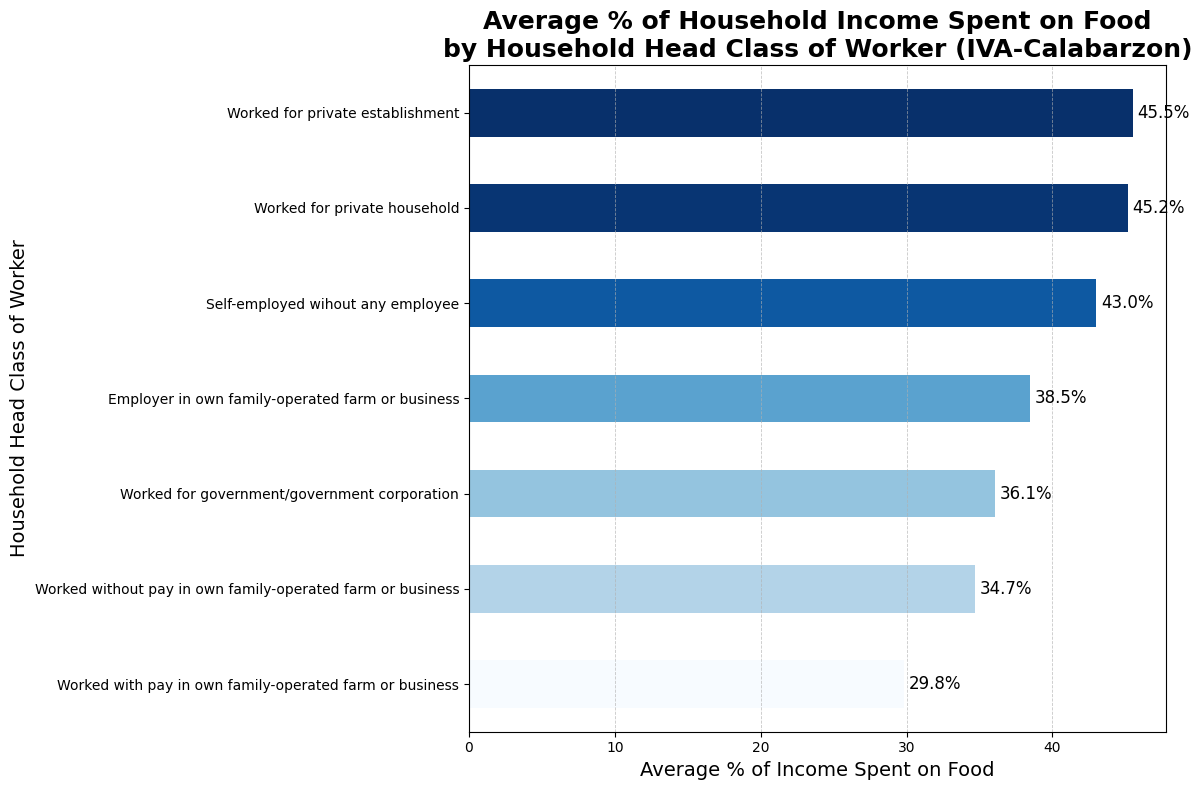

In [98]:
#4 descriptive analytics 4

import matplotlib.cm as cm

IVA_clean = IVA[
    IVA['Household Head Class of Worker']
    .str.lower()
    .ne('unknown')             
    &
    IVA['Household Head Class of Worker']
    .str.lower()
    .ne('uknown')               
]


IVA_clean['Pct_Income_on_Food'] = (
    IVA_clean['Total Food Expenditure'] / IVA_clean['Total Household Income'] * 100
)

income_food_pct = (
    IVA_clean.groupby('Household Head Class of Worker')['Pct_Income_on_Food']
             .mean()
             .sort_values(ascending=True)
)

plt.figure(figsize=(12, 8))


norm = plt.Normalize(income_food_pct.min(), income_food_pct.max())
colors = cm.Blues(norm(income_food_pct.values))

ax = income_food_pct.plot(kind='barh', color=colors)

# Title
plt.title(
    'Average % of Household Income Spent on Food\nby Household Head Class of Worker (IVA-Calabarzon)',
    fontsize=18, weight='bold'
)

# Labels
plt.xlabel('Average % of Income Spent on Food', fontsize=14)
plt.ylabel('Household Head Class of Worker', fontsize=14)

# Grid lines
plt.grid(axis='x', linestyle='--', linewidth=0.6, alpha=0.7)

# Add value labels
for i, v in enumerate(income_food_pct):
    ax.text(v + 0.3, i, f'{v:.1f}%', fontsize=12, va='center')

plt.tight_layout()
plt.show()

<h2>Insight</h2>
<hp>The chart shows substantial variation in how much of their income households spend on food depending on the class of worker of the household head in Region IVA (Calabarzon). Workers in more stable, higher-paying employment categories—such as government employees or private-sector wage earners—tend to spend a large percentage of their income on food. Because their total earnings are higher, food expenses make up a smaller share of their overall budget.</p>

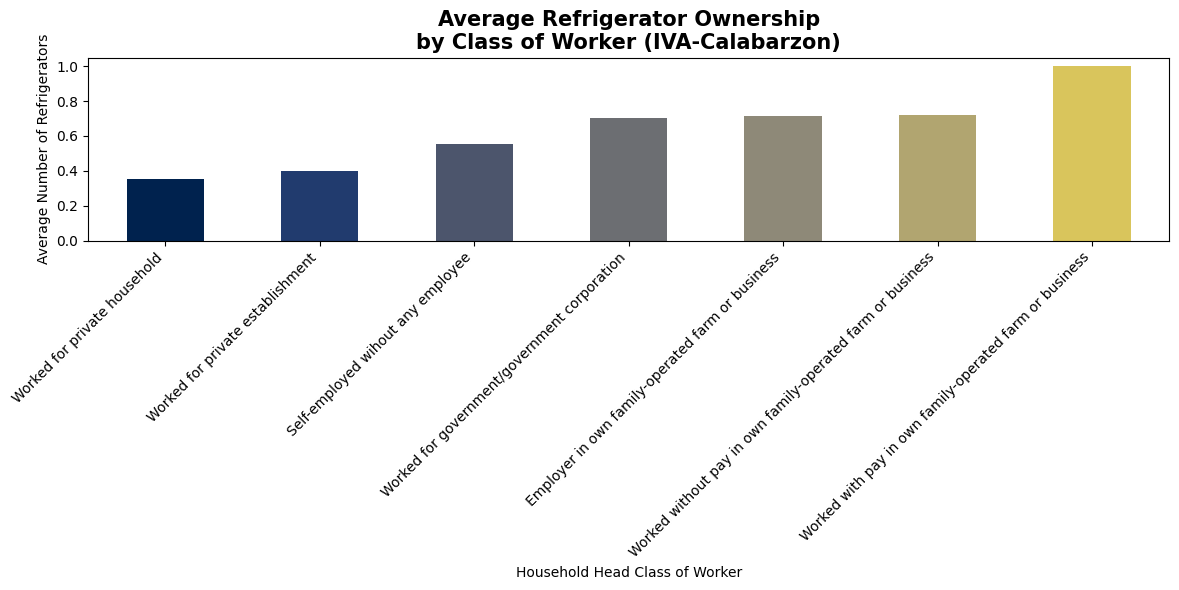

In [99]:
assets = IVA_clean.groupby('Household Head Class of Worker')['Number of Refrigerator/Freezer'].mean().sort_values()

plt.figure(figsize=(12,6))
assets.plot(kind='bar')

plt.title('Average Refrigerator Ownership\nby Class of Worker (IVA-Calabarzon)', fontsize=15, fontweight='bold')
plt.ylabel('Average Number of Refrigerators')
plt.xticks(rotation=45, ha='right')

bars = plt.gca().patches
for i, bar in enumerate(bars):
    bar.set_facecolor(plt.cm.cividis(i / len(bars)))

plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>The analysis of refrigerator ownership provides a meaningful explanation for the differences in food spending across worker classes. Worker groups that spend a higher percentage of their income on food also tend to have fewer refrigerators or freezers on average. Limited ownership of cold-storage appliances restricts their ability to buy food in bulk, store perishable items, or take advantage of discounts and promotional purchases. As a result, these households may rely more on frequent, smaller purchases—often at higher prices—which increases the share of their income spent on food.</p>

<h1>Machine Learning for Predictive Analytics</h1>

In [100]:
IVA['Household Head Sex'] = IVA['Household Head Sex'].replace({
    'Male': 1,
    'Female': 0
})


features = ['Household Head Sex',
            'Total Number of Family members',
            'Total number of family members employed',
            'Members with age less than 5 year old',
            'Members with age 5 - 17 years old',
            'Household Head Age',
            'Electricity',
            'Number of Washing Machine',
            'Number of Airconditioner',
          ]

y1 = IVA['Total Household Income']
X1 = IVA[features]

In [101]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

model1 = DecisionTreeRegressor()
model1.fit(X1_train, y1_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [102]:
predictions1 = model1.predict(X1)

predictions1

array([156880., 151380., 282373., ..., 172746., 549970., 318531.],
      shape=(4162,))

In [103]:
r2_scr = r2_score(y1, predictions1)
print(f"R² Score: {r2_scr: .2%}")

R² Score:  75.52%


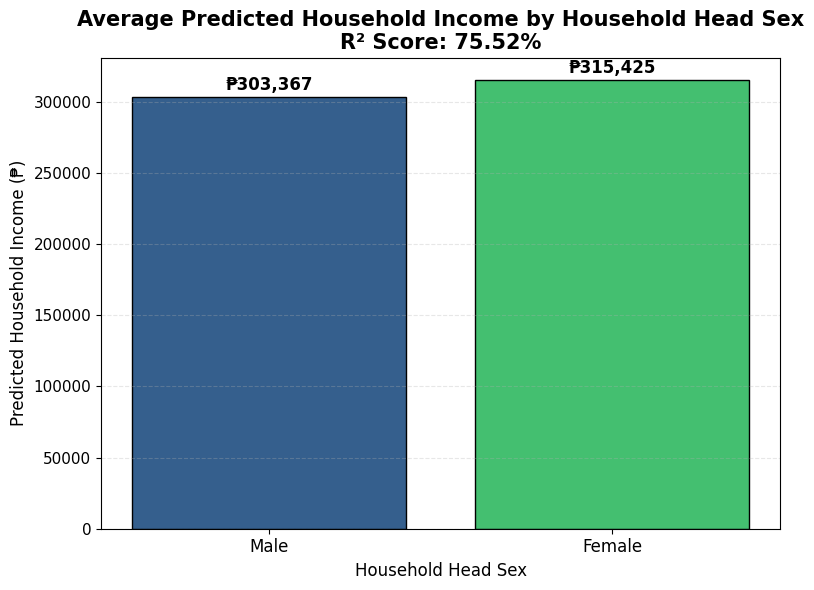

In [113]:
IVA['Predicted Household Income'] = predictions1

predicted_household_income = (
    IVA.groupby('Household Head Sex')['Predicted Household Income']
    .mean()
    .sort_values()
)

sex_labels = {0: "Female", 1: "Male"}
predicted_household_income.index = predicted_household_income.index.map(sex_labels)

plt.figure(figsize=(8,6)) 

colors = plt.cm.viridis([0.3, 0.7])

bars = plt.bar(
    predicted_household_income.index,
    predicted_household_income.values,
    color=colors,
    edgecolor='black'
)

plt.title(
    f"Average Predicted Household Income by Household Head Sex\nR² Score: {r2_scr:.2%}",
    fontsize=15,
    fontweight='bold'
)

plt.xlabel("Household Head Sex", fontsize=12)
plt.ylabel("Predicted Household Income (₱)", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 5000,  
        f"₱{height:,.0f}",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>The model predicts that female-headed households in IVA–Calabarzon tend to have slightly higher household incomes compared to male-headed households. On average, female household heads show a predicted income of ₱316,770, which is about ₱13,680 more than the predicted income for male household heads (₱303,090).</p>

In [114]:
feature = [
    'Total Number of Family members',
    'Members with age less than 5 year old',
    'Members with age 5 - 17 years old',
    'Total number of family members employed',
    'Number of bedrooms',
    'Total Household Income',
    'Total Income from Entrepreneurial Acitivites',
]

y = IVA['Total Food Expenditure']
X = IVA[feature]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [116]:
predictions = model.predict(X)

predictions

array([ 54092.,  80889., 112023., ...,  82154., 140874.,  32392.],
      shape=(4162,))

In [117]:
r2 = r2_score(y, predictions)
print(f"R² Score: {r2: .1%}")

R² Score:  86.5%


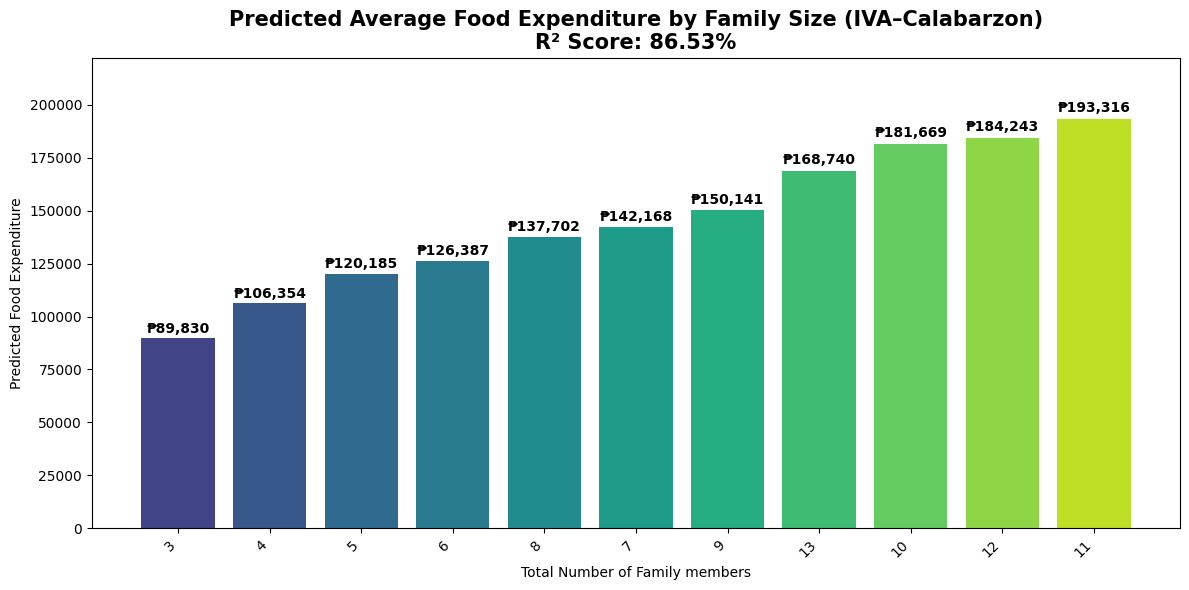

In [118]:
IVA['Predicted Food Expenditure'] = predictions

predicted_food = IVA.groupby('Total Number of Family members')['Predicted Food Expenditure'].mean().sort_values()

predicted_food = predicted_food.drop([1,2,14, 15, 16], errors='ignore')

plt.figure(figsize=(12,6))

colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(predicted_food)))

bars = plt.bar(predicted_food.index.astype(str), predicted_food.values, color=colors)

plt.title(
    f'Predicted Average Food Expenditure by Family Size (IVA–Calabarzon)\nR² Score: {r2:.2%}',
    fontsize=15, fontweight='bold'
)

plt.ylabel('Predicted Food Expenditure')
plt.xlabel('Total Number of Family members')
plt.xticks(rotation=45, ha='right')

# 🔧 FIX: Add padding so labels don't overlap top edge
max_height = predicted_food.max()
plt.ylim(0, max_height * 1.15)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + (height * 0.01),
        f"₱{height:,.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


<h2>Insight</h2>
<p>Households with 1 to 3 members show a moderate rise in predicted spending, suggesting manageable food requirements for smaller families. However, beginning around 4 to 7 members, food expenditure increases at a more noticeable pace, implying that each additional member contributes significantly to the household’s total food cost.<br>
<br>
From 8 to 13 members, the growth becomes even more pronounced. These larger households require substantially more resources, and the predicted expenditures rise sharply, indicating both higher per-meal consumption and the cumulative burden of feeding many individuals.</p>